# Predicting vigilance using machine learning
## Random Forest Model 1
Rosalie Lucas (6540384)

This is the first model from my thesis predicting drops in vigilance using machine learning.
In this model different temperature features will be used to train a random forest. These features are variable between trials.
The features are all iButton temperature sensors, FLIR data and distal-proximal gradients calculated from this data.

In [65]:
# Import Libraries needed
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier

# Installed Graphviz using Pip3

In [66]:
PATH = '/Users/roos/Developer/Bachelor-Thesis'

In [67]:
data_file_path = '/Users/roos/Data/all_trials_noNaN.csv'
data_file = pd.read_csv(data_file_path)
data = data_file[['9A00000045146841',
       'F9000000452CCF41', '76000000452C9741', '7200000045201D41', '4B0000004516B141', 'CB000000452D7441', 'DPG_finger-chest',
       'DPG_nose-forehead', 'DPG_pinna-mastoid', 'results', 'FLIR_forehead', 'FLIR_nose', 'FLIR_DPG_nose-forehead']]

for column in data:  # Describe the amount of different features in each column (column is a feature)
    unique_values = np.unique(data[column])
    number_values = len(unique_values)
    if number_values < 12:
        print("The number of values for feature {} : {} -- {}".format(column, number_values, unique_values))
    else:
        print("The number of values for feature {} : {}".format(column, number_values))

print(data.isnull().sum())

The number of values for feature 9A00000045146841 : 27
The number of values for feature F9000000452CCF41 : 65
The number of values for feature 76000000452C9741 : 38
The number of values for feature 7200000045201D41 : 25
The number of values for feature 4B0000004516B141 : 187
The number of values for feature CB000000452D7441 : 73
The number of values for feature DPG_finger-chest : 366
The number of values for feature DPG_nose-forehead : 236
The number of values for feature DPG_pinna-mastoid : 63
The number of values for feature results : 2 -- [0. 1.]
The number of values for feature FLIR_forehead : 1717
The number of values for feature FLIR_nose : 1717
The number of values for feature FLIR_DPG_nose-forehead : 1717
9A00000045146841          0
F9000000452CCF41          0
76000000452C9741          0
7200000045201D41          0
4B0000004516B141          0
CB000000452D7441          0
DPG_finger-chest          0
DPG_nose-forehead         0
DPG_pinna-mastoid         0
results                  

In [68]:
# plot = sns.pairplot(data, hue='results', palette="Set1")

In [69]:
# Splitting the data
X = data.drop('results', axis=1).values
Y = data['results'].values
print('X shape: {}'.format(np.shape(X)))
print('Y shape: {}'.format(np.shape(Y)))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

X shape: (1719, 12)
Y shape: (1719,)


In [70]:
dt = DecisionTreeClassifier(max_depth=3, random_state=30)
dt.fit(X_train, Y_train)
print(Y_test.sum()/len(Y_test))
print(Y_train.sum()/(len(Y_train)))


0.8023255813953488
0.7709090909090909


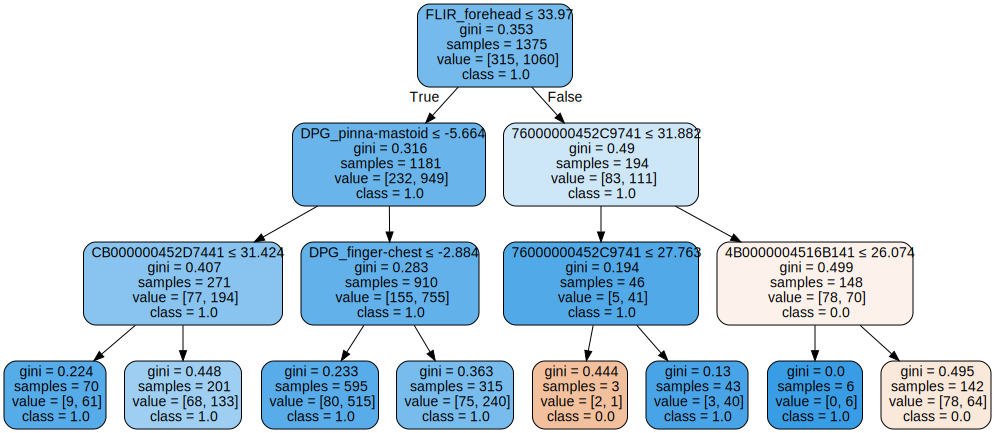

In [71]:
import graphviz

dot_data =  tree.export_graphviz(dt, out_file=None,
                                   feature_names=data.drop('results', axis=1).columns,
                                   class_names=['0.0', '1.0'],
                                   filled=True, rounded=True,
                                   special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('model1.gv', view=True)
graph


In [72]:
final = ''
fi = ''
for i, column in enumerate(data.drop('results', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))

    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})

    try:
        final = pd.concat([final, fi], ignore_index=True)
    except:
        final = fi

# Ordering the data
final_fi = final.sort_values('Feature Importance Score', ascending=False).reset_index()
final_fi

Importance of feature 9A00000045146841:, 0.000
Importance of feature F9000000452CCF41:, 0.000
Importance of feature 76000000452C9741:, 0.286
Importance of feature 7200000045201D41:, 0.000
Importance of feature 4B0000004516B141:, 0.069
Importance of feature CB000000452D7441:, 0.091
Importance of feature DPG_finger-chest:, 0.088
Importance of feature DPG_nose-forehead:, 0.000
Importance of feature DPG_pinna-mastoid:, 0.108
Importance of feature FLIR_forehead:, 0.357
Importance of feature FLIR_nose:, 0.000
Importance of feature FLIR_DPG_nose-forehead:, 0.000


,index,Variable,Feature Importance Score
0,9,FLIR_forehead,0.356870
1,2,76000000452C9741,0.285622
2,8,DPG_pinna-mastoid,0.108177
3,5,CB000000452D7441,0.091357
4,6,DPG_finger-chest,0.088495
5,4,4B0000004516B141,0.069480
6,0,9A00000045146841,0.000000
7,1,F9000000452CCF41,0.000000
8,3,7200000045201D41,0.000000
9,7,DPG_nose-forehead,0.000000


In [73]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_train, Y_train))

# Accuracy on Train
print("Testing Accuracy is: ", dt.score(X_test, Y_test))

Training Accuracy is:  0.7818181818181819
Testing Accuracy is:  0.8168604651162791


In [74]:
# Building a forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=30)
random_forest.fit(X_train, Y_train)
# prediction_test = random_forest.predict(X=X_test)

# Accuracy on Test
print("Training Accuracy is: ", random_forest.score(X_train, Y_train))
# Accuracy on Train
print("Testing Accuracy is: ", random_forest.score(X_test, Y_test))

Training Accuracy is:  1.0
Testing Accuracy is:  0.7412790697674418


In [75]:
fi2 = ''
final2 = ''
for i, column in enumerate(data.drop('results', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, random_forest.feature_importances_[i]))
    fi2 = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [random_forest.feature_importances_[i]]})

    try:
        final2 = pd.concat([final2, fi2], ignore_index=True)
    except:
        final2 = fi2

# Ordering the data
final_fi2 = final2.sort_values('Feature Importance Score', ascending=False).reset_index()
final_fi2


Importance of feature 9A00000045146841:, 0.030
Importance of feature F9000000452CCF41:, 0.055
Importance of feature 76000000452C9741:, 0.030
Importance of feature 7200000045201D41:, 0.027
Importance of feature 4B0000004516B141:, 0.081
Importance of feature CB000000452D7441:, 0.056
Importance of feature DPG_finger-chest:, 0.088
Importance of feature DPG_nose-forehead:, 0.076
Importance of feature DPG_pinna-mastoid:, 0.035
Importance of feature FLIR_forehead:, 0.191
Importance of feature FLIR_nose:, 0.169
Importance of feature FLIR_DPG_nose-forehead:, 0.162


,index,Variable,Feature Importance Score
0,9,FLIR_forehead,0.190951
1,10,FLIR_nose,0.168721
2,11,FLIR_DPG_nose-forehead,0.161908
3,6,DPG_finger-chest,0.087956
4,4,4B0000004516B141,0.080585
5,7,DPG_nose-forehead,0.075898
6,5,CB000000452D7441,0.056409
7,1,F9000000452CCF41,0.054580
8,8,DPG_pinna-mastoid,0.035198
9,2,76000000452C9741,0.030433
